In [3]:
!pip install scikit-plot
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix, classification_report


#exploration des donnees


In [4]:
from google.colab import files
uploaded = files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset.csv


In [5]:
# df = pd.read_csv('spam_ham_dataset.csv', sep='\t', names=['label', 'messages'])
df = pd.read_csv('spam_ham_dataset.csv')

In [6]:
print(df.head())

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [7]:
df = df[['text', 'label_num']]

In [8]:
print(df.head(10))
# print(df['text'].iloc[1000])

                                                text  label_num
0  Subject: enron methanol ; meter # : 988291\r\n...          0
1  Subject: hpl nom for january 9 , 2001\r\n( see...          0
2  Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3  Subject: photoshop , windows , office . cheap ...          1
4  Subject: re : indian springs\r\nthis deal is t...          0
5  Subject: ehronline web address change\r\nthis ...          0
6  Subject: spring savings certificate - take 30 ...          0
7  Subject: looking for medication ? we ` re the ...          1
8  Subject: noms / actual flow for 2 / 26\r\nwe a...          0
9  Subject: nominations for oct . 21 - 23 , 2000\...          0


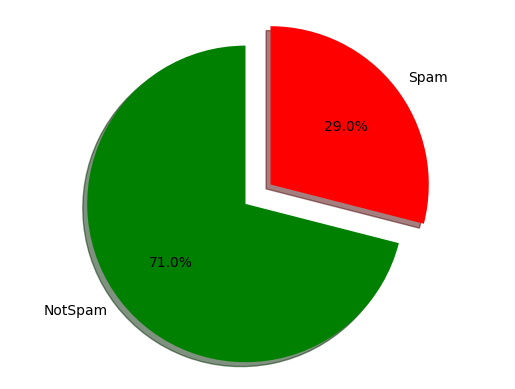

In [9]:
count_Class = pd.value_counts(df.label_num, sort = True)

# Data to Plot
labels = 'NotSpam', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['green', 'red']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

#pre-conception de modele

In [10]:
X_train, X_test, y_train, y_test = tts(df['text'], df['label_num'], test_size=0.2, random_state=1)

In [11]:
#vectorizing the data
count_vector = CountVectorizer()
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(X_test)

In [12]:
print(f"{train_data}\n avec shape : {train_data.shape}")

  (0, 38756)	1
  (0, 21562)	1
  (0, 39918)	1
  (0, 28494)	1
  (0, 34210)	1
  (0, 29749)	1
  (1, 38756)	1
  (1, 39918)	3
  (1, 34098)	1
  (1, 44332)	2
  (1, 4473)	1
  (1, 8304)	1
  (1, 2456)	1
  (1, 21399)	1
  (1, 4997)	1
  (1, 36625)	1
  (1, 5714)	1
  (1, 16456)	1
  (1, 25427)	1
  (1, 42993)	1
  (1, 5768)	3
  (1, 42782)	1
  (1, 40351)	1
  (1, 12185)	1
  (1, 17313)	1
  :	:
  (4135, 114)	2
  (4135, 10371)	1
  (4135, 30243)	2
  (4135, 6750)	1
  (4135, 18819)	1
  (4135, 9642)	1
  (4135, 36480)	1
  (4135, 11780)	1
  (4135, 1375)	1
  (4135, 331)	2
  (4135, 34566)	1
  (4135, 18230)	1
  (4135, 43962)	2
  (4135, 5633)	2
  (4135, 10957)	2
  (4135, 16203)	2
  (4135, 17986)	2
  (4135, 71)	2
  (4135, 1192)	1
  (4135, 5144)	2
  (4135, 154)	1
  (4135, 15693)	2
  (4135, 40889)	1
  (4135, 7881)	1
  (4135, 26015)	2
 avec shape : (4136, 44759)


#Naïve Bayes classifier for multinomial models

In [13]:
Mnb = MultinomialNB()
Mnb.fit(train_data, y_train)

MultinomialNB()

#Now we predict

In [14]:
MnbPredicts = Mnb.predict(test_data)
print(f"on a MnbPredicts est :\n {MnbPredicts} \n avec shape est : {MnbPredicts.shape}")

on a MnbPredicts est :
 [0 0 1 ... 0 0 0] 
 avec shape est : (1035,)


In [15]:
print("The accuracy of our Naïve Bayes multinomial model is {} %".format(accuracy_score(y_test, MnbPredicts) * 100))
print("The Precision of our Naïve Bayes multinomial model is {} %". format(precision_score(y_test, MnbPredicts)* 100))
print("The Recall of our Naïve Bayes multinomial model is {} %" . format(recall_score(y_test, MnbPredicts)* 100))

The accuracy of our Naïve Bayes multinomial model is 98.26086956521739 %
The Precision of our Naïve Bayes multinomial model is 97.03947368421053 %
The Recall of our Naïve Bayes multinomial model is 97.03947368421053 %


#We use the confusion matrix to observe the performance of our model.

The accuracy of Naive Bayes clasifier is 98.26086956521739

 [[722   9]
 [  9 295]]


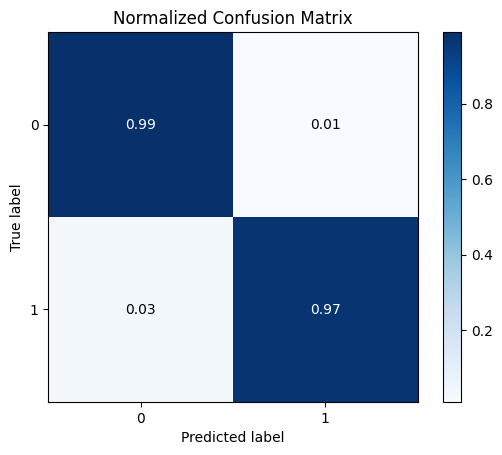

In [31]:
confusionmatrix = confusion_matrix(y_test, MnbPredicts)
print(f"The accuracy of Naive Bayes clasifier is {accuracy_score(y_test, MnbPredicts) * 100}")
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(y_test, MnbPredicts, normalize = True)
plt.show()

#Now we want to test our model mbn with a new Sms/Email massage

In [17]:
new_test_sample_ham = ["Hi, I'm Mohammad Nabizadeh and I am glad to share the program that I've written with everyone."]
new_test_sample_ham_vectorized = count_vector.transform(new_test_sample_ham)
sample_predict = Mnb.predict(new_test_sample_ham_vectorized)
# Utiliser une expression conditionnelle dans une f-string pour imprimer le résultat
print(f"Voici la prédiction du message : {'non-spam' if sample_predict == 0 else 'spam'}")

Voici la prédiction du message : non-spam


In [18]:
new_test_sample_spam= ["Congratulations, you've won a free Sony camera."]
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)
sample_predict = Mnb.predict(new_test_sample_spam_vectorized)
print(f"Voici la prédiction du message : {'non-spam' if sample_predict == 0 else 'spam'}")

Voici la prédiction du message : spam


In [19]:
new_test_sample_spam= ['''Objet : Invitation à une conférence sur la technologie de demain

Cher Youssef,

Nous sommes ravis de vous inviter à notre prochaine conférence sur la technologie de demain qui se tiendra le [Date] à [Lieu]. Cette conférence sera une opportunité unique de découvrir les dernières avancées technologiques et d'explorer les tendances qui façonneront l'avenir.

La conférence comprendra des sessions passionnantes animées par des experts de l'industrie, des démonstrations en direct de nouvelles technologies révolutionnaires et des opportunités de réseautage avec des professionnels du secteur.

Nous croyons que votre expérience et votre expertise apporteront une contribution précieuse à nos discussions, et nous serions honorés de vous avoir parmi nous.

Veuillez trouver ci-joint l'agenda complet de la conférence. N'hésitez pas à nous contacter si vous avez des questions ou des besoins particuliers.

Nous espérons vous voir parmi nous à cette conférence passionnante !

Cordialement,
Votre nom
Adidas
''']
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)
sample_predict = Mnb.predict(new_test_sample_spam_vectorized)
print(f"Voici la prédiction du message : {'non-spam' if sample_predict == 0 else 'spam'}")

Voici la prédiction du message : spam


In [20]:
new_test_sample_spam= ["Get rich quick! Buy now, limited offer!"]
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)
sample_predict = Mnb.predict(new_test_sample_spam_vectorized)
print(f"Voici la prédiction du message : {'non-spam' if sample_predict == 0 else 'spam'}")

Voici la prédiction du message : spam


In [21]:
new_test_sample_spam= ['''
Subject: Congratulations! You've won $1,000,000!

Dear lucky winner,

We are pleased to inform you that your email address has been selected as the grand prize winner of our annual lottery jackpot! You have won a staggering sum of $1,000,000!

To claim your prize, simply reply to this email with your full name, address, and a copy of your identification. Once we receive your information, we will initiate the transfer of your winnings to your bank account.

Don't miss out on this incredible opportunity to become a millionaire overnight! Reply now to claim your prize.

Best regards,
Lottery Winner Team

''']
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)
sample_predict = Mnb.predict(new_test_sample_spam_vectorized)
print(f"Voici la prédiction du message : {'non-spam' if sample_predict == 0 else 'spam'}")

Voici la prédiction du message : spam


In [22]:
new_test_sample_spam= ['''
From: john.doe@example.com
To: jane.smith@example.com
Subject: Invitation to Conference on Artificial Intelligence

Dear Jane,

I hope this email finds you well. I am writing to extend a cordial invitation to you to attend the upcoming Conference on Artificial Intelligence, which will be held in New York City from March 15th to March 17th.

This conference will feature renowned experts in the field of artificial intelligence, with presentations and discussions on topics ranging from machine learning algorithms to ethical considerations in AI development.

As a respected colleague in the field, your insights and contributions would be invaluable to our discussions. We would be honored to have you join us as a speaker on the panel discussing "The Future of AI in Healthcare".

Please let me know at your earliest convenience if you would be interested in participating. I have attached the conference agenda for your reference.

Looking forward to hearing from you soon.

Best regards,
John Doe

''']
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)
sample_predict = Mnb.predict(new_test_sample_spam_vectorized)
print(f"Voici la prédiction du message : {'non-spam' if sample_predict == 0 else 'spam'}")

Voici la prédiction du message : non-spam


In [23]:
new_test_sample_spam= ["Congratulations, you've won a free Sony camera."]
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)
sample_predict = Mnb.predict(new_test_sample_spam_vectorized)
print(f"Voici la prédiction du message : {'non-spam' if sample_predict == 0 else 'spam'}")

Voici la prédiction du message : spam


In [28]:
new_test_sample_spam= ["Hello Anas, I hope this email finds you in good health and that you are having a great day. I just wanted to let you know that we are having a team meeting tomorrow at 10:00 in the main conference room. We will discuss recent project progress and next steps. Your presence is important, so please confirm your availability as soon as possible. Please feel free to contact me if you have any questions or concerns. Kind regards, Youssef"]
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)
sample_predict = Mnb.predict(new_test_sample_spam_vectorized)
print(f"Voici la prédiction du message : {'non-spam' if sample_predict == 0 else 'spam'}")

Voici la prédiction du message : non-spam


In [29]:
new_test_sample_spam= ['''
Subject: Invitation to a conference on the technology of tomorrow

Dear Youssef,

We are delighted to invite you to our next conference on tomorrow's technology which will be held on [Date] in [Location]. This conference will be a unique opportunity to discover the latest technological advances and explore the trends that will shape the future.

The conference will feature exciting sessions led by industry experts, live demonstrations of groundbreaking new technologies, and networking opportunities with industry professionals.

We believe that your experience and expertise will make a valuable contribution to our discussions, and we would be honored to have you join us.

Please find attached the full conference agenda. Please do not hesitate to contact us if you have any questions or special needs.

We hope to see you among us at this exciting conference!

Sincerely,
Youssef
Adidas
''']
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)
sample_predict = Mnb.predict(new_test_sample_spam_vectorized)
print(f"Voici la prédiction du message : {'non-spam' if sample_predict == 0 else 'spam'}")

Voici la prédiction du message : spam


In [30]:
new_test_sample_spam= ['''
Subject: Invitation to Attend Business Networking Event

Dear Youssef,

I hope this email finds you well. I am reaching out to invite you to our upcoming business networking event scheduled for [Date] at [Location].

The event promises to be an excellent opportunity to connect with professionals from various industries, share insights, and explore potential collaborations. We have lined up engaging panel discussions, interactive workshops, and ample networking sessions to facilitate meaningful interactions.

We believe your expertise and experience would greatly enrich the discussions, and we would be honored to have you join us.

Please find attached the detailed agenda for the event. Should you have any questions or require further information, please don't hesitate to reach out.

We look forward to welcoming you to our event and fostering mutually beneficial connections.

Warm regards,
youssef

''']
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)
sample_predict = Mnb.predict(new_test_sample_spam_vectorized)
print(f"Voici la prédiction du message : {'non-spam' if sample_predict == 0 else 'spam'}")

Voici la prédiction du message : non-spam


In [25]:
# !pip install joblib
# !pip install scikit-learn
# !pip install pickle

In [26]:
# from sklearn.externals import joblib

# # Save the trained model
# joblib.dump(Mnb, 'spam_classifier_model.pkl')

# # Save the CountVectorizer
# joblib.dump(count_vector, 'count_vectorizer.pkl')

import pickle

# Save the trained model
with open('spam_classifier_model.pkl', 'wb') as f:
    pickle.dump(Mnb, f)

# Save the CountVectorizer
with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(count_vector, f)


In [27]:
# import pickle

# # Load the trained model
# with open('spam_classifier_model.pkl', 'rb') as f:
#     Mnb = pickle.load(f)

# # Load the CountVectorizer
# with open('count_vectorizer.pkl', 'rb') as f:
#     count_vector = pickle.load(f)
